Autoreload notebook

In [1]:
%load_ext autoreload
%autoreload 2

>> #### Import required packages

In [2]:
# Import packages

import pandas as pd
import numpy as np
import random
import os

#notebook reproducible 
np.random.seed(42)
random.seed(42)

# Directory listing
from glob import glob

# Visualization
import matplotlib.pylab as plt
import seaborn as sns

# Audio Processing
import librosa
import librosa.display
import IPython.display as ipd

# Color Palettes

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

>> #### Load Amharic audio files

In [2]:
amharic_audio_files = glob("../data/AMHARIC/data/train/wav/*.wav")

In [11]:
'tr_10773_tr05141' in amharic_audio_files

False

In [4]:
amharic_audio_files[0]

'../data/AMHARIC/data/train/wav/tr_3321_tr34022.wav'

In [5]:
amharic_audio_files[:5]

['../data/AMHARIC/data/train/wav/tr_3321_tr34022.wav',
 '../data/AMHARIC/data/train/wav/tr_4727_tr48028.wav',
 '../data/AMHARIC/data/train/wav/tr_10487_tr06142.wav',
 '../data/AMHARIC/data/train/wav/tr_10148_tr098110.wav',
 '../data/AMHARIC/data/train/wav/tr_6378_tr64079.wav']

Listen to sample audio files

In [6]:
ipd.Audio(amharic_audio_files[2324])

In [7]:
y, sr = librosa.load(amharic_audio_files[4])

In [8]:
y

array([-0.02164217, -0.02434997, -0.02032852, ..., -0.01848836,
       -0.02154249, -0.01406884], dtype=float32)

In [9]:
sr

22050

<AxesSubplot:title={'center':'Raw Data Sample'}>

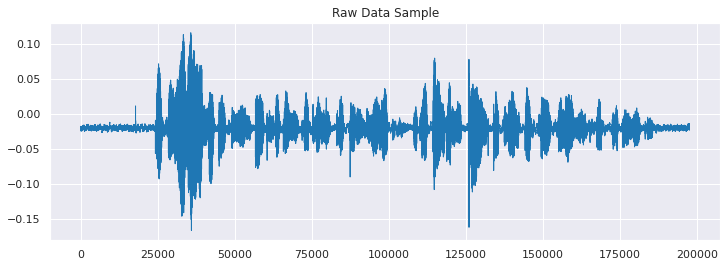

In [10]:
sns.set_style("darkgrid")
pd.Series(y).plot(figsize=(12, 4), lw=1, title="Raw Data Sample", color=color_pal[0])

In [11]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

<AxesSubplot:title={'center':'Raw Data Sample'}>

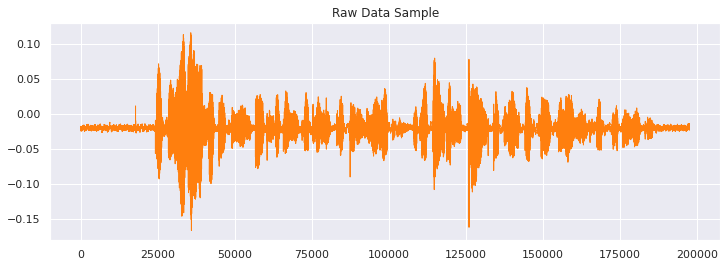

In [12]:
sns.set_style("darkgrid")
pd.Series(y_trimmed).plot(figsize=(12, 4), lw=1, title="Raw Data Sample", color=color_pal[1])

>> ### Load the entire Data

In [35]:
audio_files2 = []

for file in os.listdir('../data/AMHARIC/data/train/wav/'):
    if file.endswith(".wav"):
        audio_files2.append(file)

In [36]:
audio_files2[:5]

['tr_3321_tr34022.wav',
 'tr_4727_tr48028.wav',
 'tr_10487_tr06142.wav',
 'tr_10148_tr098110.wav',
 'tr_6378_tr64079.wav']

In [ ]:
with open('../data/AMHARIC/data/train/text') as tx:
    transcription = tx.readline()

In [60]:
amharic_audio_files = glob("../data/AMHARIC/data/train/wav/*.wav")

In [41]:
audio_files2[:2]

['tr_3321_tr34022.wav', 'tr_4727_tr48028.wav']

In [40]:
'tr_10773_tr05141' in audio_files2

False

In [34]:
'../data/AMHARIC/data/train/wav/tr_10000_tr097082' in amharic_audio_files

False

In [62]:
import json
count = 0
print("Using readlines()")
  
with open("../data/AMHARIC/data/train/text") as fp:
    Lines = fp.readlines()
    for line in Lines:
        count += 1
        valid_json = {}
        val = line.split(' ')[1:]
        val = ' '.join(val)
        # Remove any new line character
        val = val.replace("\n", "").strip()
        path = line.split(' ')[0]
        # if path == 'tr_10773_tr05141':
        #   print('Has found the path')

        path = '../data/AMHARIC/data/train/wav/' + path + '.wav'
        if path not in amharic_audio_files:
          # print(path)
          # break
          # if path == 'tr_10773_tr05141':
          #   print('Has found the path IN THE PATH SKIPPINT IT')
          # print(path)
          continue
        # append '../data/AMHARIC/data/train/wav' to the path
        # print(val)
        
        valid_json['text'] = val
        valid_json['key'] = path
        # GEt the duration of the audio file
        valid_json['duration'] = librosa.get_duration(filename=path)    
        with open('valid_corpus.json', 'a', encoding='utf-8') as fp:
          fp.write(json.dumps(valid_json, ensure_ascii=False))
          fp.write("\n")
        # print("Line{}: {}".format(count, line.strip()))
  

Using readlines()


In [2]:
!pip3 install python_speech_features

  Using cached python_speech_features-0.6.tar.gz (5.6 kB)
  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=ec9a2b5d99d279559021cd0292a881369747d32df9f833e8fa8dffc86f174916
  Stored in directory: /home/jedi/.cache/pip/wheels/09/a1/04/08e2688d2562d8f9ff89e77c6ddfbf7268e07dae1a6f22455e
Successfully built python-speech-features


In [49]:
!pip3 install tensorflow

     |████████████████████████████████| 511.7 MB 6.0 kB/s eta 0:00:015     |██████████████████▋             | 297.4 MB 324 kB/s eta 0:11:02     |██████████████████████          | 353.3 MB 202 kB/s eta 0:13:03     |█████████████████████████████▍  | 470.4 MB 320 kB/s eta 0:02:09     |███████████████████████████████▉| 509.8 MB 103 kB/s eta 0:00:19
     |████████████████████████████████| 2.4 MB 243 kB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 5.8 MB 260 kB/s eta 0:00:01
     |████████████████████████████████| 438 kB 234 kB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 350 kB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 4.4 MB 221 kB/s eta 0:00:01
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     |████████████████████

In [3]:
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from data_generator import make_audio_gen
from train import train
from models import model_2
from char_map import char_map, index_map


TRAIN_CORPUS = "./valid_corpus.json"
VALID_CORPUS = "./valid_corpus.json"
# VALID_CORPUS = "data_stbbl/valid_corpus.json"

MFCC_DIM = 13
SPECTOGRAM = False
EPOCHS = 2
MODEL_NAME = "model_2_stbbl"

################ Reminder MINI_BATCH_SIZE=250 in previous notebooks
MINI_BATCH_SIZE = 250

SORT_BY_DURATION=False
MAX_DURATION = 10.0

audio_gen = make_audio_gen(TRAIN_CORPUS, VALID_CORPUS, spectrogram=False, mfcc_dim=MFCC_DIM,
                           minibatch_size=MINI_BATCH_SIZE, sort_by_duration=SORT_BY_DURATION,
                           max_duration=MAX_DURATION)
# add the training data to the generator
audio_gen.load_train_data()
audio_gen.load_validation_data()

2022-06-01 00:24:10.984219: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-01 00:24:10.987500: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-01 00:24:10.987513: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/jedi/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [5]:
EPOCHS = 40
MODEL_NAME = "model_2_stbbl"

model = model_2(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=0.2,
                number_of_layers=5,
                output_dim=len(char_map)+1)

train(audio_gen, input_to_softmax=model, model_name=MODEL_NAME, epochs=EPOCHS, minibatch_size=MINI_BATCH_SIZE)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 the_input (InputLayer)      [(None, None, 13)]        0         
                                                                 
 layer_1_conv (Conv1D)       (None, None, 200)         28800     
                                                                 
 conv_batch_norm (BatchNorma  (None, None, 200)        800       
 lization)                                                       
                                                                 
 rnn_1 (GRU)                 (None, None, 250)         339000    
                                                                 
 bt_rnn_1 (BatchNormalizatio  (None, None, 250)        1000      
 n)                                                              
                                                                 
 rnn_2 (GRU)                 (None, None, 250)         3765

/home/jedi/Documents/Tenacademy/Week4/STT/scripts/train.py:69: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=audio_gen.next_train(), steps_per_epoch=steps_per_epoch,


Epoch 1/40
